In [2]:
from skimage import data

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import *

from itertools import cycle

from PIL import Image

from time import time

import numpy as np

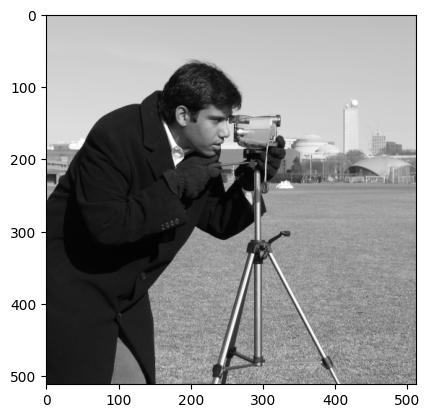

In [3]:
# load in the image and display
# Read the data as greyscale 
image = data.camera() # read the image

# Image is (687 x 1025, RGB channels)
image = np.array(image)
original_shape = image.shape

# Flatten image.
# X = np.reshape(image, [-1, 3])
X = np.reshape(image, [-1, 1])

plt.imshow(image, cmap=plt.cm.gray)


In [4]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)

7.54


In [5]:
print("Mean-Shift Fitting model")
t0 = time()

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

print("done in %0.3fs." % (time() - t0))

Mean-Shift Fitting model
done in 0.878s.


In [6]:
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

(262144,)
(9, 1)
number of estimated clusters : 9


In [7]:
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

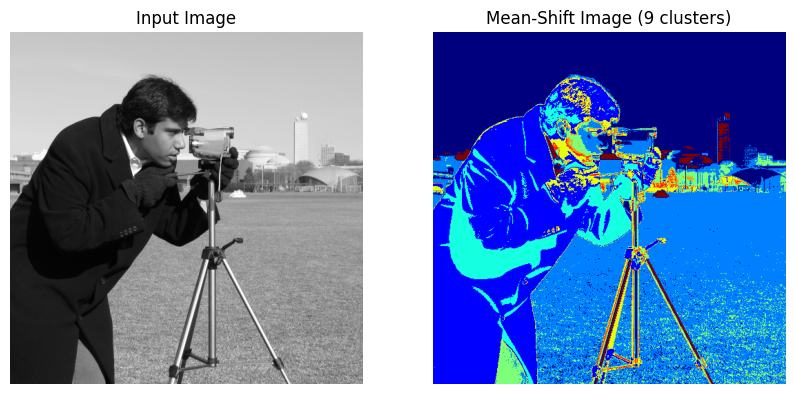

In [8]:
plt.figure(2).set_size_inches((10, 40))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Input Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap=plt.cm.jet)
plt.title('Mean-Shift Image (%d clusters)'%n_clusters_)
plt.axis('off')
plt.show()

In [10]:
# Compare K-Mean Clustering
# Group similar grey levels using n_clusters
n_clusters = 10

print("K-menas Fitting model")
t0 = time()

# Create a line array, the lazy way
X = image.reshape((-1, 1))
# Define the k-means clustering problem
k_m = KMeans(n_clusters=n_clusters, n_init=4)
# Solve the k-means clustering problem
k_m.fit(X)

# Get the coordinates of the clusters centres as a 1D array
values = k_m.cluster_centers_.squeeze()

# Get the label of each point
labels = k_m.labels_
    
# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = image.shape

# Get the values of min and max intensity in the original image
vmin = image.min()
vmax = image.max()

print("done in %0.3fs." % (time() - t0))

K-menas Fitting model
done in 0.414s.


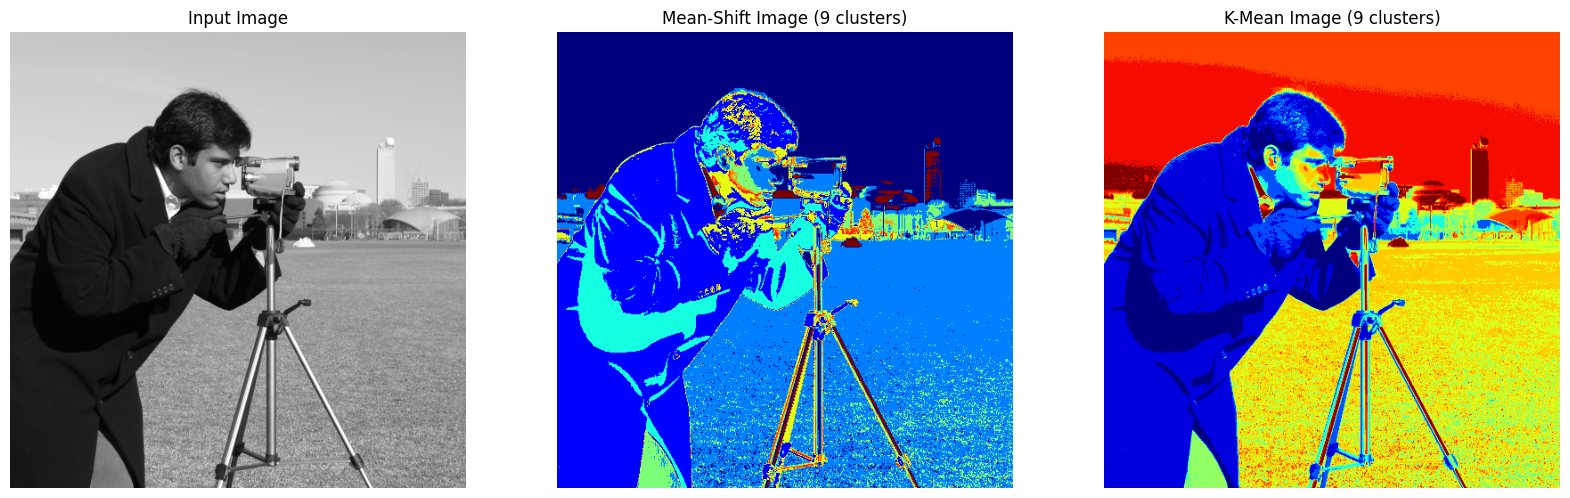

In [11]:
plt.figure(3).set_size_inches((20, 40))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Input Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(segmented_image, cmap=plt.cm.jet)
plt.title('Mean-Shift Image (%d clusters)'%n_clusters_)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img_segm, cmap=plt.cm.jet)
plt.title('K-Mean Image (%d clusters)'%n_clusters_)
plt.axis('off')
plt.show()